# **1. Nhập và xử lý dữ liệu**

In [59]:
# Cài đặt các thư viện cần thiết
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split, cross_val_score, KFold, cross_validate
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer       
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.feature_selection import SelectKBest, f_classif

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score

In [60]:
## Nhập dữ liệu
df = pd.read_csv('customer_purchase_data.csv')

df.head()

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
0,40,1,66120.267939,8,0,30.568601,0,5,1
1,20,1,23579.773583,4,2,38.240097,0,5,0
2,27,1,127821.306432,11,2,31.633212,1,0,1
3,24,1,137798.623120,19,3,46.167059,0,4,1
4,31,1,99300.964220,19,1,19.823592,0,0,1


In [61]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 1500 non-null   int64  
 1   Gender              1500 non-null   int64  
 2   AnnualIncome        1500 non-null   float64
 3   NumberOfPurchases   1500 non-null   int64  
 4   ProductCategory     1500 non-null   int64  
 5   TimeSpentOnWebsite  1500 non-null   float64
 6   LoyaltyProgram      1500 non-null   int64  
 7   DiscountsAvailed    1500 non-null   int64  
 8   PurchaseStatus      1500 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 105.6 KB


,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.00000
mean,44.298667,0.504667,84249.164338,10.420000,2.012667,30.469040,0.326667,2.555333,0.43200
std,15.537259,0.500145,37629.493078,5.887391,1.428005,16.984392,0.469151,1.705152,0.49552
min,18.000000,0.000000,20001.512518,0.000000,0.000000,1.037023,0.000000,0.000000,0.00000
25%,31.000000,0.000000,53028.979155,5.000000,1.000000,16.156700,0.000000,1.000000,0.00000
50%,45.000000,1.000000,83699.581476,11.000000,2.000000,30.939516,0.000000,3.000000,0.00000
75%,57.000000,1.000000,117167.772858,15.000000,3.000000,44.369863,1.000000,4.000000,1.00000
max,70.000000,1.000000,149785.176481,20.000000,4.000000,59.991105,1.000000,5.000000,1.00000


In [62]:
# Loại bỏ các dữ liệu trùng lặp
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1388 entries, 0 to 1499
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 1388 non-null   int64  
 1   Gender              1388 non-null   int64  
 2   AnnualIncome        1388 non-null   float64
 3   NumberOfPurchases   1388 non-null   int64  
 4   ProductCategory     1388 non-null   int64  
 5   TimeSpentOnWebsite  1388 non-null   float64
 6   LoyaltyProgram      1388 non-null   int64  
 7   DiscountsAvailed    1388 non-null   int64  
 8   PurchaseStatus      1388 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 108.4 KB


# **2. Thống kê mô tả**

## Age

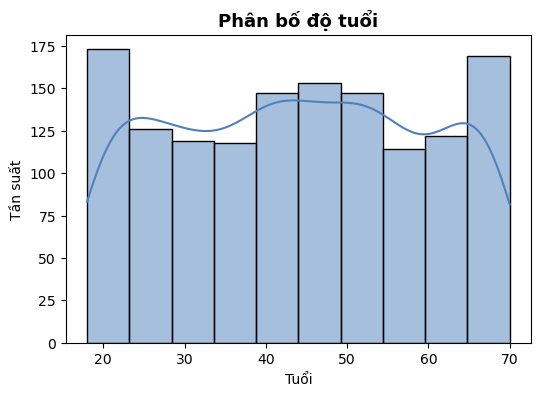

In [63]:
plt.figure(figsize=(6,4))
sns.histplot(df['Age'], bins=10, kde=True, color='#4f81bd')
plt.title('Phân bố độ tuổi', fontsize=13, fontweight='bold')
plt.xlabel('Tuổi')
plt.ylabel('Tần suất')
plt.show()

## Gender

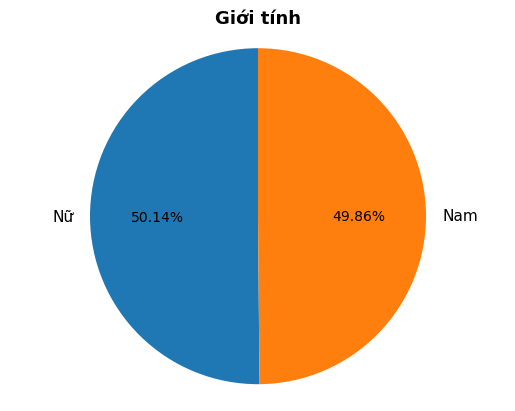

In [64]:
# Tính tần suất
Gender_counts = df['Gender'].value_counts()

# Vẽ biểu đồ tròn
fig, ax = plt.subplots()

wedges, texts, autotexts = ax.pie(
    Gender_counts, 
    labels=['Nữ', 'Nam'],   
    autopct='%1.2f%%',  
    startangle=90,
    textprops={'color': 'black', 'fontsize': 11}
)

# Tùy chỉnh vị trí và font chữ cho phần trăm
for autotext in autotexts:
    autotext.set_color('black')
    autotext.set_fontsize(10)
    autotext.set_fontweight('normal')

# Thêm tiêu đề
plt.title('Giới tính', fontsize=13, fontweight='bold')

# Giữ biểu đồ là hình tròn
plt.axis('equal')

plt.show()

## AnnualIncome

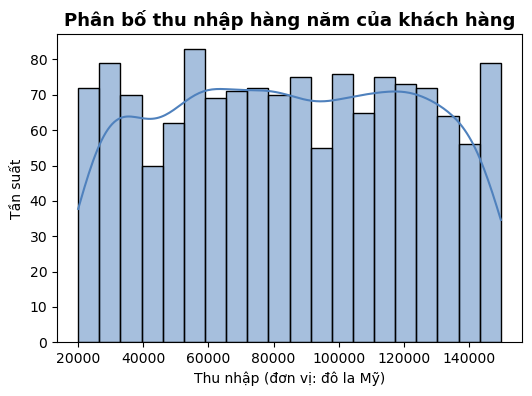

In [65]:
plt.figure(figsize=(6,4))
sns.histplot(df['AnnualIncome'], bins=20, kde=True, color='#4f81bd')
plt.title('Phân bố thu nhập hàng năm của khách hàng', fontsize=13, fontweight='bold')
plt.xlabel('Thu nhập (đơn vị: đô la Mỹ)')
plt.ylabel('Tần suất')
plt.show()

## NumberOfPurchases

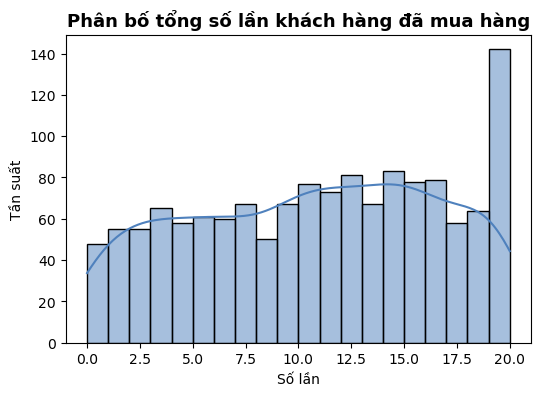

In [66]:
plt.figure(figsize=(6,4))
sns.histplot(df['NumberOfPurchases'], bins=20, kde=True, color='#4f81bd')
plt.title('Phân bố tổng số lần khách hàng đã mua hàng', fontsize=13, fontweight='bold')
plt.xlabel('Số lần')
plt.ylabel('Tần suất')
plt.show()

## ProductCategory

ProductCategory
1    306
4    289
3    270
0    269
2    254
Name: count, dtype: int64


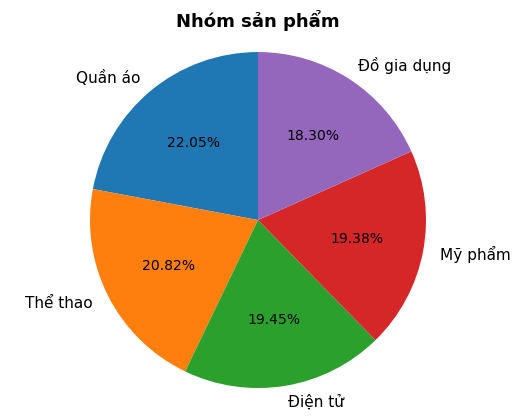

In [67]:
# Tính tần suất
ProductCategory_counts = df['ProductCategory'].value_counts()
print(ProductCategory_counts)

# Vẽ biểu đồ tròn
fig, ax = plt.subplots()

wedges, texts, autotexts = ax.pie(
    ProductCategory_counts, 
    labels=['Quần áo', 'Thể thao', 'Điện tử', 'Mỹ phẩm', 'Đồ gia dụng'],   
    autopct='%1.2f%%',  
    startangle=90,
    textprops={'color': 'black', 'fontsize': 11}
)

# Tùy chỉnh vị trí và font chữ cho phần trăm
for autotext in autotexts:
    autotext.set_color('black')
    autotext.set_fontsize(10)
    autotext.set_fontweight('normal')

# Thêm tiêu đề
plt.title('Nhóm sản phẩm', fontsize=13, fontweight='bold')

# Giữ biểu đồ là hình tròn
plt.axis('equal')

plt.show()

## TimeSpentOnWebsite	

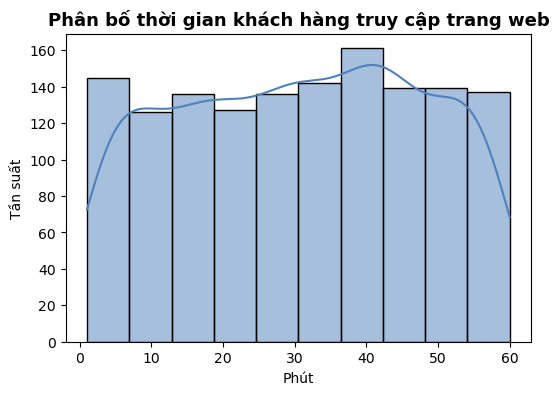

In [68]:
plt.figure(figsize=(6,4))
sns.histplot(df['TimeSpentOnWebsite'], bins=10, kde=True, color='#4f81bd')
plt.title('Phân bố thời gian khách hàng truy cập trang web', fontsize=13, fontweight='bold')
plt.xlabel('Phút')
plt.ylabel('Tần suất')
plt.show()

## LoyaltyProgram

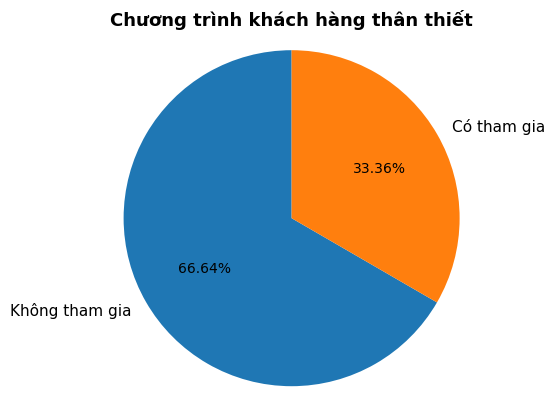

In [69]:
# Tính tần suất
LoyaltyProgram_counts = df['LoyaltyProgram'].value_counts()

# Vẽ biểu đồ tròn
fig, ax = plt.subplots()

wedges, texts, autotexts = ax.pie(
    LoyaltyProgram_counts, 
    labels=['Không tham gia', 'Có tham gia'],   
    autopct='%1.2f%%',  
    startangle=90,
    textprops={'color': 'black', 'fontsize': 11}
)

# Tùy chỉnh vị trí và font chữ cho phần trăm
for autotext in autotexts:
    autotext.set_color('black')
    autotext.set_fontsize(10)
    autotext.set_fontweight('normal')

# Thêm tiêu đề
plt.title('Chương trình khách hàng thân thiết', fontsize=13, fontweight='bold')

# Giữ biểu đồ là hình tròn
plt.axis('equal')

plt.show()

##	DiscountsAvailed

DiscountsAvailed
4    249
5    247
3    246
1    219
2    217
0    210
Name: count, dtype: int64


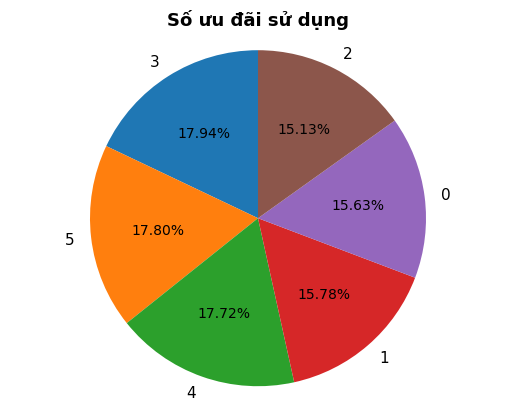

In [70]:
# Tính tần suất
DiscountsAvailed_counts = df['DiscountsAvailed'].value_counts()
print(DiscountsAvailed_counts)

# Vẽ biểu đồ tròn
fig, ax = plt.subplots()

wedges, texts, autotexts = ax.pie(
    DiscountsAvailed_counts, 
    labels=[3,5,4,1,0,2],   
    autopct='%1.2f%%',  
    startangle=90,
    textprops={'color': 'black', 'fontsize': 11}
)

# Tùy chỉnh vị trí và font chữ cho phần trăm
for autotext in autotexts:
    autotext.set_color('black')
    autotext.set_fontsize(10)
    autotext.set_fontweight('normal')

# Thêm tiêu đề
plt.title('Số ưu đãi sử dụng', fontsize=13, fontweight='bold')

# Giữ biểu đồ là hình tròn
plt.axis('equal')

plt.show()

## Correlation heatmap

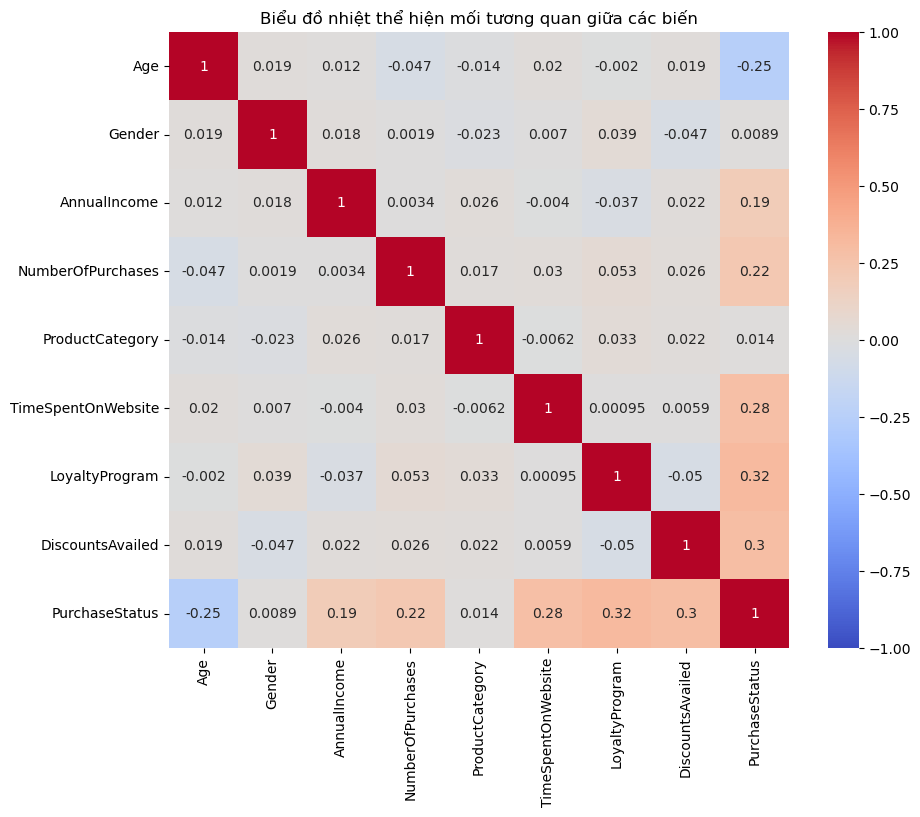

In [71]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', vmax=1, vmin=-1)
plt.title('Biểu đồ nhiệt thể hiện mối tương quan giữa các biến')
plt.show()

## Numeric columns boxplot

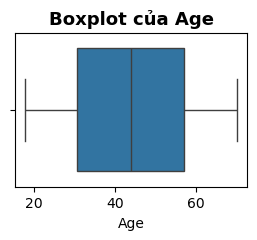

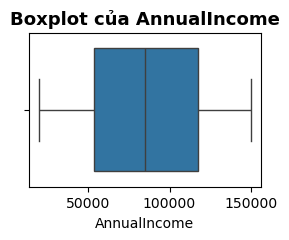

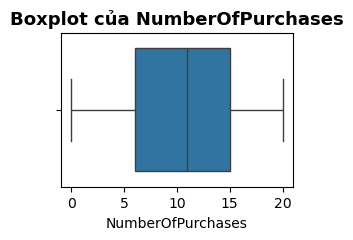

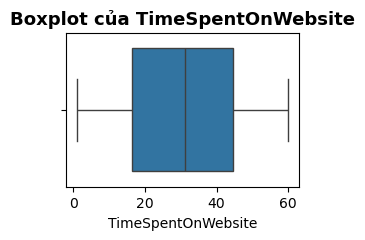

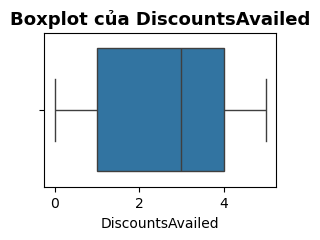

In [72]:
numeric_cols = df[['Age', 'AnnualIncome', 'NumberOfPurchases', 'TimeSpentOnWebsite', 'DiscountsAvailed']]

# Vẽ boxplot
for col in numeric_cols:
    plt.figure(figsize=(3, 2))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot của {col}', fontsize=13, fontweight='bold')
    plt.xlabel(col)
    plt.show()

Vì bộ dữ liệu không có missing value hay outlier nên trong pipeline ta không cần sử dụng Imputer

# **3. Sử dụng mô hình học máy**

## Tạo tập train và test

In [73]:
# Tách X (features) và y (target)
X = df.drop(['PurchaseStatus'], axis=1)
y = df['PurchaseStatus']

X.head()

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed
0,40,1,66120.267939,8,0,30.568601,0,5
1,20,1,23579.773583,4,2,38.240097,0,5
2,27,1,127821.306432,11,2,31.633212,1,0
3,24,1,137798.623120,19,3,46.167059,0,4
4,31,1,99300.964220,19,1,19.823592,0,0


## Tạo pipeline xử lý dữ liệu

In [74]:
# 1. Xác định danh sách các cột
numeric_features = ['Age', 'AnnualIncome', 'NumberOfPurchases', 'TimeSpentOnWebsite', 'DiscountsAvailed']

# 2. Tạo pipeline con cho DỮ LIỆU SỐ
numeric_transformer = Pipeline(steps=[
    # StandardScaler: Chuẩn hóa dữ liệu (mean=0, std=1)
    ('scaler', StandardScaler())                  
])

# 3. Kết hợp bằng ColumnTransformer
# ColumnTransformer nhận một danh sách các 'transformers'
# Mỗi transformer là một tuple: (tên_định_danh, pipeline_con, danh_sách_cột_áp_dụng)
# remainder='passthrough': Giữ lại các cột không được liệt kê (thay vì loại bỏ chúng)
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)],
    remainder='passthrough'
)

In [75]:
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('num',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['Age', 'AnnualIncome', 'NumberOfPurchases',
                                  'TimeSpentOnWebsite', 'DiscountsAvailed'])])

## Tạo pipeline toàn diện
1.  **`preprocessor`**: (Cleaning + Transform) đã định nghĩa ở trên.
2.  **`selector`**: (Feature Selection) `SelectKBest` để chọn lọc đặc trưng.
3.  **`model`**: (Modeling) Mô hình tùy chọn

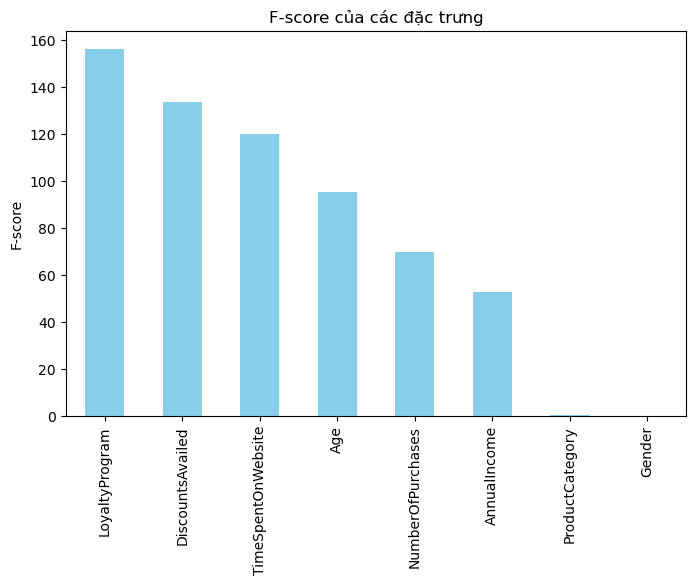

In [76]:
# score_func=f_classif: Dùng hàm f_classif (ANOVA F-test) để chấm điểm đặc trưng

# X là các đặc trưng, y là biến mục tiêu
selector = SelectKBest(score_func=f_classif, k='all')
selector.fit(X, y)

# Sắp xếp các F-score theo thứ tự giảm dần
scores = pd.Series(selector.scores_, index=X.columns)
scores = scores.sort_values(ascending=False)

# Vẽ biểu đồ
plt.figure(figsize=(8,5))
scores.plot(kind='bar', color='skyblue')
plt.title('F-score của các đặc trưng')
plt.ylabel('F-score')
plt.show()

F-score của ProductCategory và Gender giảm mạnh và gần như bằng 0 nên ta có thể chọn số k tối ưu là 6.

### Linear Regression

In [77]:
full_pipeline_ln = Pipeline(steps=[
    # BƯỚC 1: Cleaning + Transform (Sử dụng ColumnTransformer)
    ('preprocessor', preprocessor),
    
    # BƯỚC 2: Feature Selection (Chọn đặc trưng)
    # SelectKBest: Chọn 'k' đặc trưng tốt nhất
    ('selector', SelectKBest(score_func=f_classif, k=6)),
    
    # BƯỚC 3: Modeling
    # LogisticRegression: Model cuối cùng để dự đoán
    ('model', LogisticRegression(random_state=42))
])

full_pipeline_ln

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'AnnualIncome',
                                                   'NumberOfPurchases',
                                                   'TimeSpentOnWebsite',
                                                   'DiscountsAvailed'])])),
                ('selector', SelectKBest(k=6)),
                ('model', LogisticRegression(random_state=42))])

In [78]:
# Dùng cross-validation trên toàn bộ tập X và y gốc

# Định nghĩa chiến lược chia K-Fold (ví dụ: 5 folds)
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
# Gọi cross_validate với TOÀN BỘ pipeline
scoring = ['accuracy', 'precision', 'recall', 'f1']

cv_scores_ln = cross_validate(full_pipeline_ln, X, y, cv=kfold, scoring=scoring)
cv_scores_ln

{'fit_time': array([0.03872705, 0.00550914, 0.00620031, 0.00374627, 0.00747848]),
 'score_time': array([0.01303887, 0.00738192, 0.00605297, 0.00903678, 0.00752544]),
 'test_accuracy': array([0.84892086, 0.82014388, 0.80215827, 0.79061372, 0.81588448]),
 'test_precision': array([0.82706767, 0.82170543, 0.808     , 0.82142857, 0.76642336]),
 'test_recall': array([0.85271318, 0.79699248, 0.76515152, 0.70769231, 0.84677419]),
 'test_f1': array([0.83969466, 0.80916031, 0.78599222, 0.76033058, 0.8045977 ])}

### Decision Tree

In [80]:
full_pipeline_dt = Pipeline(steps=[
    # BƯỚC 1: Cleaning + Transform (Sử dụng ColumnTransformer)
    ('preprocessor', preprocessor),
    
    # BƯỚC 2: Feature Selection (Chọn đặc trưng)
    ('selector', SelectKBest(score_func=f_classif, k=6)),
    
    # BƯỚC 3: Modeling
    ('model', DecisionTreeClassifier(random_state=42))
])

full_pipeline_dt

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'AnnualIncome',
                                                   'NumberOfPurchases',
                                                   'TimeSpentOnWebsite',
                                                   'DiscountsAvailed'])])),
                ('selector', SelectKBest(k=6)),
                ('model', DecisionTreeClassifier(random_state=42))])

In [81]:
# Gọi cross_validate với TOÀN BỘ pipeline
cv_scores_dt = cross_validate(full_pipeline_dt, X, y, 
                              cv=kfold,
                              scoring=scoring)

cv_scores_dt

{'fit_time': array([0.02258921, 0.0089376 , 0.0096314 , 0.00850701, 0.00920701]),
 'score_time': array([0.0086844 , 0.01132083, 0.00751567, 0.00800776, 0.0070436 ]),
 'test_accuracy': array([0.85971223, 0.86690647, 0.79496403, 0.88086643, 0.86642599]),
 'test_precision': array([0.8358209 , 0.875     , 0.79069767, 0.85925926, 0.84251969]),
 'test_recall': array([0.86821705, 0.84210526, 0.77272727, 0.89230769, 0.86290323]),
 'test_f1': array([0.85171103, 0.85823755, 0.7816092 , 0.8754717 , 0.85258964])}

### Suppor Vector Machine

In [82]:
full_pipeline_svm = Pipeline(steps=[
    # BƯỚC 1: Cleaning + Transform (Sử dụng ColumnTransformer)
    ('preprocessor', preprocessor),
    
    # BƯỚC 2: Feature Selection (Chọn đặc trưng)
    ('selector', SelectKBest(score_func=f_classif, k=6)),
    
    # BƯỚC 3: Modeling
    ('model', SVC(random_state=42))
])

full_pipeline_svm

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'AnnualIncome',
                                                   'NumberOfPurchases',
                                                   'TimeSpentOnWebsite',
                                                   'DiscountsAvailed'])])),
                ('selector', SelectKBest(k=6)),
                ('model', SVC(random_state=42))])

In [83]:
# Gọi cross_validate với TOÀN BỘ pipeline
cv_scores_svm = cross_validate(full_pipeline_svm, X, y, 
                               cv=kfold,
                               scoring=scoring)

cv_scores_svm

{'fit_time': array([0.03771162, 0.02601528, 0.03008151, 0.02427435, 0.02451158]),
 'score_time': array([0.01512027, 0.00850344, 0.01530504, 0.0135386 , 0.01998782]),
 'test_accuracy': array([0.88848921, 0.85611511, 0.85611511, 0.85559567, 0.86642599]),
 'test_precision': array([0.8828125 , 0.87804878, 0.88333333, 0.90909091, 0.82222222]),
 'test_recall': array([0.87596899, 0.81203008, 0.8030303 , 0.76923077, 0.89516129]),
 'test_f1': array([0.87937743, 0.84375   , 0.84126984, 0.83333333, 0.85714286])}

### Naive Bayes

In [84]:
full_pipeline_nb = Pipeline(steps=[
    # BƯỚC 1: Cleaning + Transform (Sử dụng ColumnTransformer)
    ('preprocessor', preprocessor),
    
    # BƯỚC 2: Feature Selection (Chọn đặc trưng)
    ('selector', SelectKBest(score_func=f_classif, k=6)),
    
    # BƯỚC 3: Modeling
    ('model', GaussianNB())
])

full_pipeline_nb

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'AnnualIncome',
                                                   'NumberOfPurchases',
                                                   'TimeSpentOnWebsite',
                                                   'DiscountsAvailed'])])),
                ('selector', SelectKBest(k=6)), ('model', GaussianNB())])

In [85]:
# Gọi cross_validate với TOÀN BỘ pipeline
cv_scores_nb = cross_validate(full_pipeline_nb, X, y, 
                              cv=kfold,
                              scoring=scoring)

cv_scores_nb

{'fit_time': array([0.00739169, 0.00257468, 0.00660276, 0.        , 0.0045135 ]),
 'score_time': array([0.00914574, 0.01457334, 0.00972915, 0.01644778, 0.00751305]),
 'test_accuracy': array([0.85971223, 0.83093525, 0.80215827, 0.82310469, 0.83032491]),
 'test_precision': array([0.8515625 , 0.84126984, 0.81818182, 0.87155963, 0.79389313]),
 'test_recall': array([0.84496124, 0.79699248, 0.75      , 0.73076923, 0.83870968]),
 'test_f1': array([0.84824903, 0.81853282, 0.7826087 , 0.79497908, 0.81568627])}

### Random Forest

In [86]:
full_pipeline_rf = Pipeline(steps=[
    # BƯỚC 1: Cleaning + Transform (Sử dụng ColumnTransformer)
    ('preprocessor', preprocessor),
    
    # BƯỚC 2: Feature Selection (Chọn đặc trưng)
    ('selector', SelectKBest(score_func=f_classif, k=6)),
    
    # BƯỚC 3: Modeling
    ('model', RandomForestClassifier(random_state=42))
])

full_pipeline_rf

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'AnnualIncome',
                                                   'NumberOfPurchases',
                                                   'TimeSpentOnWebsite',
                                                   'DiscountsAvailed'])])),
                ('selector', SelectKBest(k=6)),
                ('model', RandomForestClassifier(random_state=42))])

In [87]:
# Gọi cross_validate với TOÀN BỘ pipeline
cv_scores_rf = cross_validate(full_pipeline_nb, X, y,
                              cv=kfold,
                              scoring=scoring)

cv_scores_rf

{'fit_time': array([0.0019033 , 0.00724578, 0.00659943, 0.00584102, 0.00593901]),
 'score_time': array([0.0114491 , 0.00762725, 0.00947237, 0.01254153, 0.01018023]),
 'test_accuracy': array([0.85971223, 0.83093525, 0.80215827, 0.82310469, 0.83032491]),
 'test_precision': array([0.8515625 , 0.84126984, 0.81818182, 0.87155963, 0.79389313]),
 'test_recall': array([0.84496124, 0.79699248, 0.75      , 0.73076923, 0.83870968]),
 'test_f1': array([0.84824903, 0.81853282, 0.7826087 , 0.79497908, 0.81568627])}